# Desarrollo de STFT
***

## Integrantes

-Felipe Véliz ; felipe.veliz@alumnos.uach.cl

-Leonardo Santos ; leonardo.santos@alumnos.uach.cl

## Institución

Universidad Austral de Chile

## Profesor

- Victor Poblete

## Asignatura

ACUS099

## Objetivo

El objetivo de este trabajo es desarrollar la transformada de fourier de tiempo corto de forma discreta, usando lenguaje de programación python.

# Librerias a usar

In [3]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftshift
import IPython.display as disp 
from scipy.signal import chirp
from scipy.signal.windows import hann,hamming
#%matplotlib inline


## Preparando la señal

Para demsotrar como funciona la STFT, necesitamos una señal inicial con la cual trabajar.


In [8]:

sr=44100 #Sample rate 
t_fin=10  #Duracion de la señal en segundos [s]
t=t_fin*sr  #Duracion de la señal 
T=np.linspace(0,t_fin,t) #vector de tiempo
sig= chirp(T, f0=50, f1=5000, t1=t_fin, method='linear')  #señal usando chirp
disp.Audio(sig, rate=sr)

In [39]:
len_f=1024  #largo de la ventana 
overlap= 0.5  #porcentaje de traslape

num_f=int(round(len(sig)/(len_f*(1-overlap)))) #numero de ventanas en funcion de la señal
count_f= len_f*num_f    #cantidad total de la muestras de la matriz

print("La señal posee un total de",num_f, "ventanas")

La señal posee un total de 861 ventanas


## Aplicación de función ventana

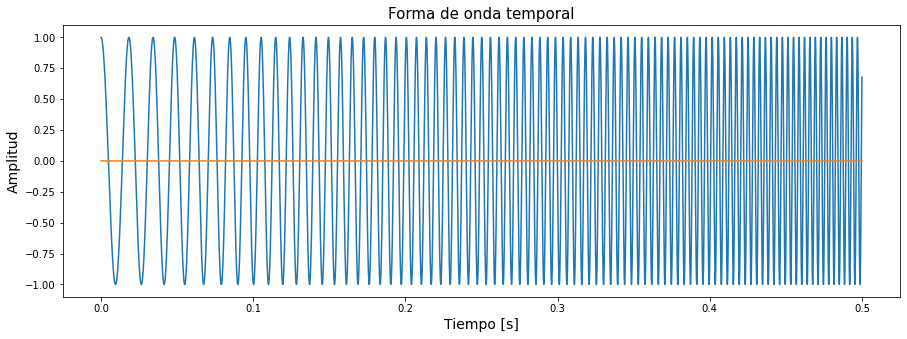

In [40]:
tp=0.5
y=np.zeros(len(sig[0:int(tp*sr)]))
plt.figure(figsize=(15,5))
plt.plot(T[0:int(tp*sr)],sig[0:int(tp*sr)])
plt.plot(T[0:int(tp*sr)],y)
plt.xlabel("Tiempo [s]",size=14)
plt.ylabel("Amplitud",size=14)
plt.title("Forma de onda temporal",size=15)
plt.show()

## Funciones ventana

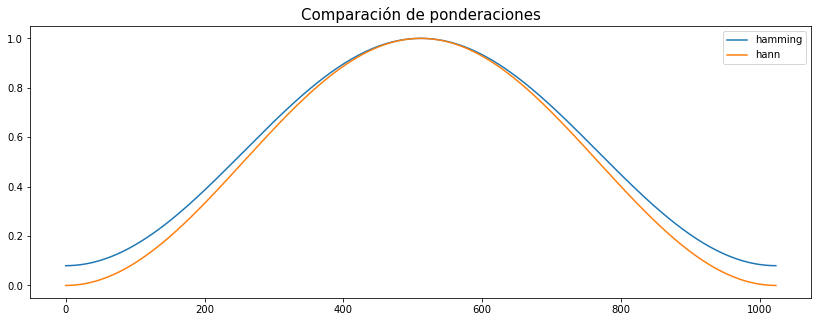

In [41]:
ham=hamming(len_f)
han=hann(len_f)


plt.figure(figsize=(14,5))
plt.plot(ham,label="hamming")
plt.plot(han,label="hann")
plt.title("Comparación de ponderaciones",size=15)
plt.legend()
plt.show()

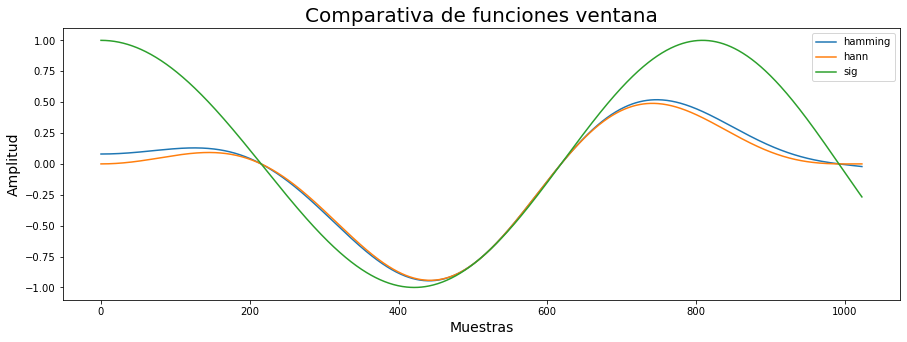

In [47]:
f_0=sig[0:len_f]*ham
f_1=sig[0:len_f]*han
f_2=sig[0:len_f]
plt.figure(figsize=(15,5))
plt.plot(f_0,label="hamming")
plt.plot(f_1,label="hann")
plt.plot(f_2,label="sig")
#plt.plot(f_0,f_1,f_2)

plt.ylabel('Amplitud',size=14)
plt.xlabel('Muestras',size=14)
plt.title('Comparativa de funciones ventana',size=20)
plt.legend()
plt.show()